In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
nepse_data = pd.read_csv("data_set_ready_for_training.csv")
nepse_data.head(5)

,closing_price,news,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,975.0,"[[0.2306930273771286, 0.792356550693512, 0.642...",-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372
1,954.0,"[[0.31689509749412537, 0.8638337850570679, 0.6...",-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707
2,917.0,"[[0.31150949001312256, 0.7647785544395447, 0.6...",-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584
3,903.0,"[[0.1868913620710373, 0.7952941060066223, 0.61...",-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895
4,885.0,"[[0.3303453326225281, 0.8576347231864929, 0.68...",-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076


In [3]:
nepse_data = nepse_data.replace([np.inf, -np.inf], np.nan).dropna()

In [4]:
nepse_data['Label'] = nepse_data['closing_price'].rolling(window=2).apply(lambda x:  1 if x[1]>x[0] else 0 ).shift(-1)
nepse_data['target'] = nepse_data['closing_price'].shift(-1)
nepse_data = nepse_data[:-1]
nepse_data.tail()

,closing_price,news,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO,Label,target
1372,1273.0,"[[0.36220553517341614, 0.9683135151863098, 0.5...",73.0,1257.027190,-82.501011,5.000000,0.967400,85.0,0.141176,1252.666667,0.517338,1.0,1277.0
1373,1277.0,"[[0.38373106718063354, 0.8309400081634521, 0.5...",77.0,1260.099930,-74.796552,7.416667,0.965309,85.0,0.094118,1254.000000,0.495022,0.0,1272.0
1374,1272.0,"[[0.3729100525379181, 0.8552981615066528, 0.60...",53.0,1261.930710,-68.306774,5.235294,0.971226,66.0,0.196970,1258.666667,0.489393,0.0,1265.0
1375,1265.0,"[[0.15445244312286377, 0.6669142842292786, 0.7...",-20.0,1262.402908,-63.002169,2.916667,0.980316,20.0,1.000000,1271.666667,0.453701,0.0,1257.0
1376,1257.0,"[[0.3814601004123688, 0.7400802969932556, 0.64...",-16.0,1261.571692,-58.766343,0.125000,0.990692,20.0,1.000000,1263.666667,0.465451,0.0,1235.0


In [5]:
#Using only tech indicators and closing price
dataset = nepse_data.drop("news", axis=1)
dataset.head()

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO,Label,target
0,975.0,-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372,0.0,954.0
1,954.0,-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707,0.0,917.0
2,917.0,-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584,0.0,903.0
3,903.0,-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895,0.0,885.0
4,885.0,-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076,1.0,897.0


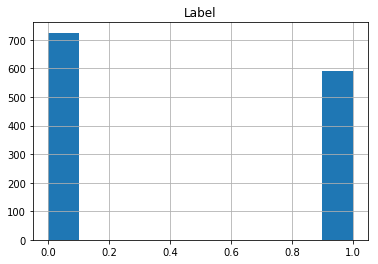

In [6]:
hist = dataset.hist("Label")

In [7]:
X = dataset.drop(["target","Label"], axis = 1)
Y = dataset["Label"]
X.head()

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,975.0,-87.0,1087.863864,-58.947313,0.149378,1.126154,106.0,0.820755,997.666667,0.154372
1,954.0,-2.0,1067.269422,-65.253876,0.250000,1.122642,38.0,1.000000,966.666667,0.105707
2,917.0,-75.0,1044.151049,-72.401798,0.480000,1.135878,75.0,1.000000,942.000000,0.069584
3,903.0,-87.0,1022.435502,-78.293327,0.000000,1.120598,87.0,1.000000,932.000000,0.068895
4,885.0,-90.0,1001.291578,-83.452392,0.000000,1.108927,90.0,1.000000,915.000000,0.108076


In [8]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Label, dtype: float64

In [45]:
scaler = StandardScaler()
scaler.fit(X.values)
x_norm = pd.DataFrame(scaler.transform(X.values), index=X.index, columns=X.columns)

# SVM Classifier

{'C': 100, 'kernel': 'sigmoid', 'random_state': 5}


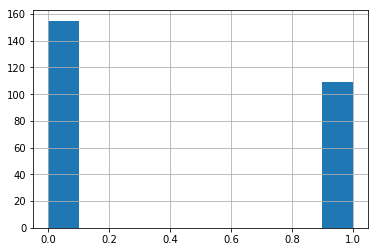

In [46]:
#Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(x_norm,Y,test_size=0.2,shuffle=False)
test_hist = Y_test.hist()
#define model
model = SVC(random_state=5)
#search for best hyperparameter
grid_data = {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'random_state': [5]}
grid = GridSearchCV(model, grid_data, scoring = 'f1').fit(X_train,Y_train)
print(grid.best_params_)
model = grid.best_estimator_


In [47]:
#Prediction
y_pred = model.predict(X_test)
print(y_pred)
acc = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print("Accuracy Score: {0:0.2f} %".format(acc * 100))
print("F1 Score: {0:0.4f}".format(f1))


[1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
Accuracy Score: 52.27 %
F1 Score: 0.3298


# SVM Regression

In [48]:

y = dataset["target"]
x_norm.head()

,closing_price,momentum,EMA,MACD,RSI,ROI,ATR,williams,CCI,UO
0,-1.769629,-0.751830,-1.547293,-1.100855,-0.331177,2.667207,0.160012,0.727474,-1.725909,-1.280679
1,-1.816039,0.010508,-1.593452,-1.219465,-0.319227,2.591076,-0.296228,1.158930,-1.794748,-1.462921
2,-1.897810,-0.644206,-1.645269,-1.353898,-0.291911,2.877979,-0.047980,1.158930,-1.849524,-1.598194
3,-1.928751,-0.751830,-1.693941,-1.464702,-0.348918,2.546782,0.032533,1.158930,-1.871730,-1.600776
4,-1.968531,-0.778736,-1.741331,-1.561730,-0.348918,2.293798,0.052661,1.158930,-1.909481,-1.454049


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size=0.2,shuffle=False)
regression_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
print(regression_model)
regression_model.fit(x_train,y_train)



SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

2288.844401340854   39.217765598518554


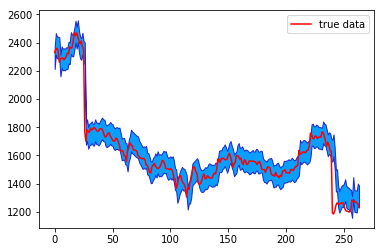

In [50]:

Y_pred = regression_model.predict(x_test)
stdev = np.sqrt(sum((regression_model.predict(x_train) - y_train)**2) / (len(y_train) - 2))
print(Y_pred[0], ' ', stdev)
higher = Y_pred + 1.96*stdev
lower = Y_pred - 1.96*stdev
#print(higher[0])
x = range(264)
plt.plot(x, y_test,color='red', label='true data')
#plt.plot(x, Y_pred, color='green', label='predicted')

plt.fill_between(x,higher,lower,edgecolor='#1B2ACC', facecolor='#089FFF')
plt.legend(loc = "upper right")
plt.show()

In [51]:
regression_model.score(x_test,y_test)

0.939372695832631

In [59]:
class StockPredictor():
    def __init__(self,x_train,kernel='rbf', C=1e3, gamma=0.1):
        self.predictor = SVR(kernel=kernel, C=C, gamma=gamma)
        self.scaler = StandardScaler()
        self.scaler.fit(x_train.values)
        self.stdev = None
        
        
    def train(self,x,y):
        self.predictor.fit(x,y)
        self.stdev = np.sqrt(sum((self.predictor.predict(x) - y)**2) / (len(y) - 2))   
        
    def predict(self,X,critical_value):
        x_n = self.scaler.transform(X.values)
        x_n = pd.DataFrame(x_n, index=X.index, columns=X.columns)
        yhat = self.predictor.predict(X)
        higher, lower = yhat + critical_value * self.stdev, yhat - critical_value * self.stdev
        return higher, lower
        
        

In [60]:
st_pred = StockPredictor(x_train)

In [63]:
st_pred.train(x_train,y_train)
model_filename = 'stock_predictor.sav'
pickle.dump(st_pred,open(model_filename, 'wb'))

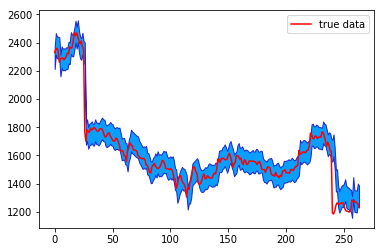

In [64]:
predictor = pickle.load(open('stock_predictor.sav','rb'))
upper, lower = predictor.predict(x_test,1.96)
x_axis = range(264)
plt.plot(x_axis, y_test,color='red', label='true data')
#plt.plot(x, Y_pred, color='green', label='predicted')

plt.fill_between(x_axis,upper,lower,edgecolor='#1B2ACC', facecolor='#089FFF')
plt.legend(loc = "upper right")
plt.show()